<a href="https://colab.research.google.com/github/regina-fonseca-avila/data_science/blob/main/graficos/pizza_combinado_com_barra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRÁFRICO DE PIZZA COMBINADO COM GRÁFICO DE BARRA**

Começando com o [Bar of Pie](https://matplotlib.org/stable/gallery/pie_and_polar_charts/bar_of_pie.html), que é um dos exemplos mostrados  [Examples using matplotlib.pyplot.pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html), lembrando que é possível criar cores dinâmicas para os labels como feito em [Discrete distribution as horizontal bar chart](https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#discrete-distribution-as-horizontal-bar-chart), usando o Gemini para descobrir como fazer algumas alterações, e seguindo o livro Storytelling Com Dados (Cole Nussbaumer Knaflic, Editora Alta Books), foram feitas alterações no gráfico de forma a diminuir a saturação de cores e focar na categoria mais importante. O resultando é impressionante.

# Exemplo da Matplotlib
Pode ser visto [aqui](https://matplotlib.org/stable/gallery/pie_and_polar_charts/bar_of_pie.html)

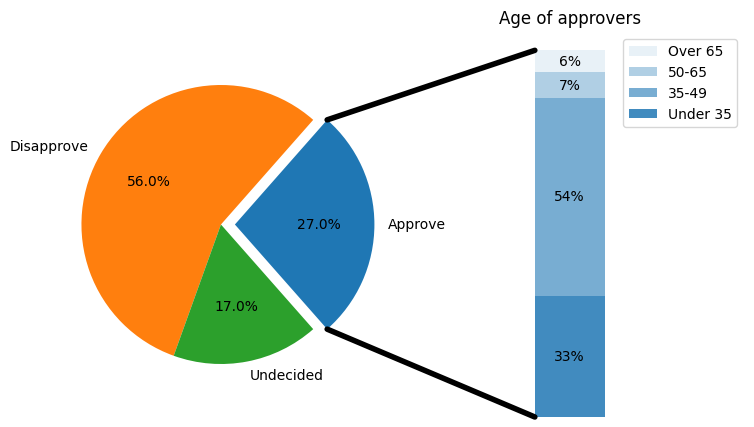

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [.27, .56, .17]
labels = ['Approve', 'Disapprove', 'Undecided']
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.33, .54, .07, .06]
age_labels = ['Under 35', '35-49', '50-65', 'Over 65']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Age of approvers')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

# Novas Cores

**Principais alterações**

- Novas cores
- Título geral
- Cores dinâmicas nos labels (Os percentuais)
- Título na legenda, originalmente era no segundo gráfico
- Uso sns.light_palette para cores das barras (antes usava o parâmetro alpha)

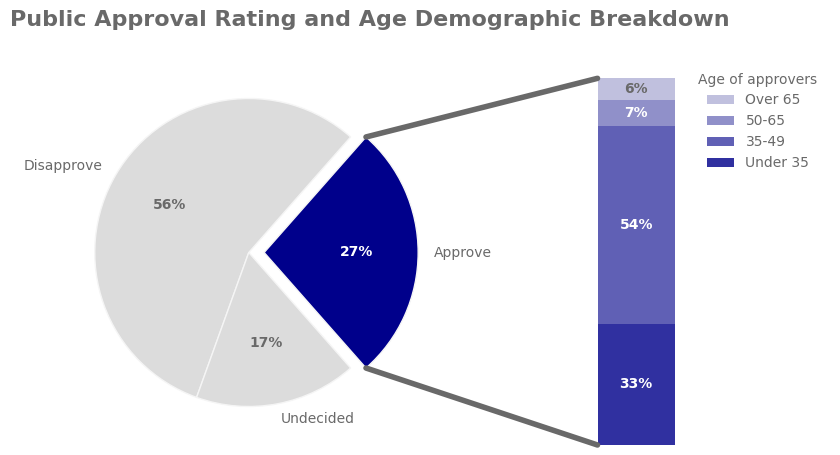

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import ConnectionPatch
from matplotlib.colors import to_rgb
import numpy as np

# --- SETTINGS & COLOR DEFINITIONS ---
cc = 'darkblue'    # Highlight color for the "Approve" slice/bars
mc = 'gainsboro'   # Background color for other slices
font_color = 'dimgray'
conector_color = 'dimgray'

# --- DATA PREPARATION ---
# Pie chart: Overall sentiment
overall_ratios = [.27, .56, .17]
labels = ['Approve', 'Disapprove', 'Undecided']
explode = [0.1, 0, 0] # Explode the first slice (Approve)
colors = [cc, mc, mc]

# Bar chart: Breakdown of the "Approve" slice by age
age_ratios = [.33, .54, .07, .06]
age_labels = ['Under 35', '35-49', '50-65', 'Over 65']

# --- FIGURE CREATION ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) # Increased width slightly for better title fit
fig.subplots_adjust(wspace=0)

# --- PIE CHART SECTION (AX1) ---
angle = -180 * overall_ratios[0]
wedges, _, autotexts = ax1.pie(overall_ratios,
                      autopct='%1.0f%%',
                      startangle=angle,
                      labels=labels,
                      explode=explode,
                      colors=colors,
                      wedgeprops={'edgecolor': 'whitesmoke', 'linewidth': 1},
                      textprops={'color': font_color})

for i, color in enumerate(colors):
    rgb = to_rgb(color)
    brightness = (rgb[0] * 299 + rgb[1] * 587 + rgb[2] * 114) / 1000
    text_color = 'white' if brightness < 0.6 else 'dimgray'
    autotexts[i].set_color(text_color)
    autotexts[i].set_weight('bold')

# --- BAR CHART SECTION (AX2) ---
bottom = 1
width = .2
paleta = sns.light_palette(cc, n_colors=len(age_ratios) + 2)

for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    current_color = paleta[j+1]
    bc = ax2.bar(0, height, width, bottom=bottom, color=current_color, label=label)
    r, g, b, _ = bc[0].get_facecolor()
    brightness = (r * 299 + g * 587 + b * 114) / 1000
    cor_fonte_dinamica = 'white' if brightness < 0.6 else 'dimgray'
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center',
                  color=cor_fonte_dinamica, fontweight='bold')

legend = ax2.legend(frameon=False, title='Age of approvers', labelcolor=font_color)
legend.get_title().set_color(font_color)
ax2.axis('off')
ax2.set_xlim(-2.5 * width, 2.5 * width)

# --- CONNECTOR LINES SECTION ---
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

x_top = r * np.cos(np.pi / 180 * theta2) + center[0]
y_top = r * np.sin(np.pi / 180 * theta2) + center[1]
con_top = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                          xyB=(x_top, y_top), coordsB=ax1.transData)
con_top.set_color(conector_color)
con_top.set_linewidth(4)
ax2.add_artist(con_top)

x_bot = r * np.cos(np.pi / 180 * theta1) + center[0]
y_bot = r * np.sin(np.pi / 180 * theta1) + center[1]
con_bot = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                          xyB=(x_bot, y_bot), coordsB=ax1.transData)
con_bot.set_color(conector_color)
con_bot.set_linewidth(4)
ax2.add_artist(con_bot)

# --- FINAL LAYOUT & DESCRIPTIVE TITLE ---
plt.suptitle('Public Approval Rating and Age Demographic Breakdown',
             fontsize=16,
             fontweight='bold',
             color=font_color,
             x=0.08,
             ha='left')

plt.show()

# Valores absolutos como input, inclusão dos valores absolutos

**Principais alterações em relação ao anterior**

- Inputs são os valores absolutos, os percentuais passaram a ser calculados, facilitava para incluir o valor absoluto logo abaixo do percentual
- Mostra os valores absolutos, usa função para isso no gráfico de pizza
- O Valor total geral também é mostrado
- A fatia colorida não está mais destacaca, alteração feita no parametro explode do gráfico pie

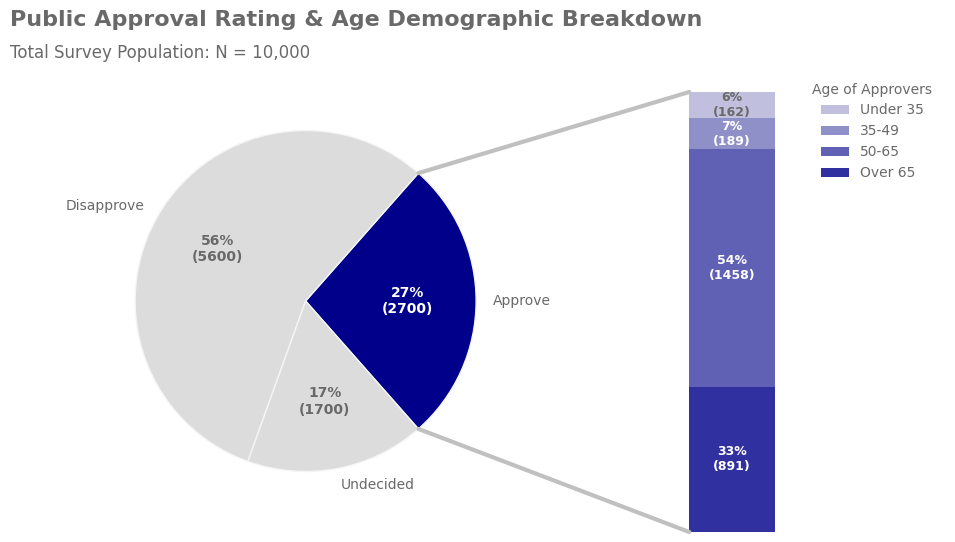

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import ConnectionPatch
from matplotlib.colors import to_rgb
import numpy as np

# --- DATA & SETTINGS ---
overall_counts = [2700, 5600, 1700] # Absolute numbers for pie
labels = ['Approve', 'Disapprove', 'Undecided']
total_n= sum(overall_counts)


age_counts = [162, 189, 1458, 891] # Absolute numbers for bar
age_labels = ['Under 35', '35-49', '50-65', 'Over 65']


age_counts = [162, 189, 1458, 891]
# 1. Calculate the sum of all elements in the list
total_observations = sum(age_counts)
# 2. Use list comprehension to divide each count by the total to get the ratio
age_ratios = [count / total_observations for count in age_counts]

cc = '#00008B'
mc = 'gainsboro'
font_color = 'dimgray'
conector_color = 'silver'

# --- FIGURE CREATION ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 6))
fig.subplots_adjust(wspace=0)

# --- PIE CHART SECTION (AX1) ---
angle = -180 * overall_ratios[0]
colors = [cc, mc, mc]
explode = [0, 0, 0]

# Function to customize text
def func_format(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{pct:.0f}%\n({absolute})"

wedges, _, autotexts = ax1.pie(overall_counts,
                      autopct=lambda pct: func_format(pct, overall_counts),
                      startangle=angle,
                      labels=labels,
                      colors=colors,
                      wedgeprops={'edgecolor': 'whitesmoke', 'linewidth': 1},
                      textprops={'color': font_color, 'fontsize': 10})

# Dynamic text coloring for percentages
for i, color in enumerate(colors):
    rgb = to_rgb(color)
    brightness = (rgb[0] * 299 + rgb[1] * 587 + rgb[2] * 114) / 1000
    text_color = 'white' if brightness < 0.6 else 'dimgray'
    autotexts[i].set_color(text_color)
    autotexts[i].set_weight('bold')

# --- BAR CHART SECTION (AX2) ---
bottom = 1
width = 0.25
paleta = sns.light_palette(cc, n_colors=len(age_ratios) + 2)

# We iterate through the data to build the stacked bar
for j, (rel, count, label) in enumerate(zip(age_ratios, age_counts, age_labels)):
    bottom -= rel
    current_color = paleta[j+1]
    bc = ax2.bar(0, rel, width, bottom=bottom, color=current_color, label=label)

    # Label formatting: "Percentage% (Count)"
    r, g, b, _ = bc[0].get_facecolor()
    brightness = (r * 299 + g * 587 + b * 114) / 1000
    text_color = 'white' if brightness < 0.6 else 'dimgray'

    ax2.bar_label(bc, labels=[f"{rel:.0%}\n({count})"], label_type='center',
                  color=text_color, fontweight='bold', fontsize=9)

# Legend and Axis adjustment
legend = ax2.legend(frameon=False, title='Age of Approvers',
                    labelcolor=font_color)
legend.get_title().set_color(font_color)
ax2.axis('off')
ax2.set_xlim(-2.5 * width, 2.5 * width)

# --- CONNECTOR LINES SECTION ---
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

x_top = r * np.cos(np.pi / 180 * theta2) + center[0]
y_top = r * np.sin(np.pi / 180 * theta2) + center[1]
con_top = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                          xyB=(x_top, y_top), coordsB=ax1.transData)
con_top.set_color(conector_color)
con_top.set_linewidth(3)
ax2.add_artist(con_top)

x_bot = r * np.cos(np.pi / 180 * theta1) + center[0]
y_bot = r * np.sin(np.pi / 180 * theta1) + center[1]
con_bot = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                          xyB=(x_bot, y_bot), coordsB=ax1.transData)
con_bot.set_color(conector_color)
con_bot.set_linewidth(3)
ax2.add_artist(con_bot)

# --- TITLES ---
plt.suptitle('Public Approval Rating & Age Demographic Breakdown',
             fontsize=16, fontweight='bold', color=font_color, x=0.05, ha='left')
plt.figtext(0.05, 0.9, f'Total Survey Population: N = {total_n:,}',
            fontsize=12, color=font_color, ha='left')

plt.show()

# Ponto de atenção: Cor Clara

- Categoria de destaque com cor clara
- Problema: dificuldade para diferenciar cores no gráfico de barras

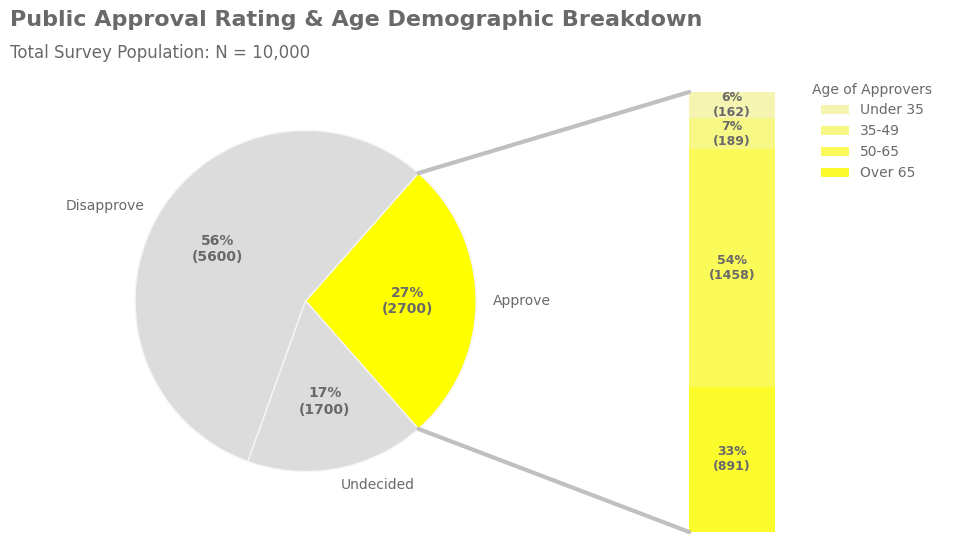

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import ConnectionPatch
from matplotlib.colors import to_rgb
import numpy as np

# --- DATA & SETTINGS ---
overall_counts = [2700, 5600, 1700] # Absolute numbers for pie
labels = ['Approve', 'Disapprove', 'Undecided']
total_n= sum(overall_counts)


age_counts = [162, 189, 1458, 891] # Absolute numbers for bar
age_labels = ['Under 35', '35-49', '50-65', 'Over 65']


age_counts = [162, 189, 1458, 891]
# 1. Calculate the sum of all elements in the list
total_observations = sum(age_counts)
# 2. Use list comprehension to divide each count by the total to get the ratio
age_ratios = [count / total_observations for count in age_counts]

cc = 'yellow'
mc = 'gainsboro'
font_color = 'dimgray'
conector_color = 'silver'

# --- FIGURE CREATION ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 6))
fig.subplots_adjust(wspace=0)

# --- PIE CHART SECTION (AX1) ---
angle = -180 * overall_ratios[0]
colors = [cc, mc, mc]
explode = [0, 0, 0]

# Function to customize text
def func_format(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{pct:.0f}%\n({absolute})"

wedges, _, autotexts = ax1.pie(overall_counts,
                      autopct=lambda pct: func_format(pct, overall_counts),
                      startangle=angle,
                      labels=labels,
                      colors=colors,
                      wedgeprops={'edgecolor': 'whitesmoke', 'linewidth': 1},
                      textprops={'color': font_color, 'fontsize': 10})

# Dynamic text coloring for percentages
for i, color in enumerate(colors):
    rgb = to_rgb(color)
    brightness = (rgb[0] * 299 + rgb[1] * 587 + rgb[2] * 114) / 1000
    text_color = 'white' if brightness < 0.6 else 'dimgray'
    autotexts[i].set_color(text_color)
    autotexts[i].set_weight('bold')

# --- BAR CHART SECTION (AX2) ---
bottom = 1
width = 0.25
paleta = sns.light_palette(cc, n_colors=len(age_ratios) + 2)

# We iterate through the data to build the stacked bar
for j, (rel, count, label) in enumerate(zip(age_ratios, age_counts, age_labels)):
    bottom -= rel
    current_color = paleta[j+1]
    bc = ax2.bar(0, rel, width, bottom=bottom, color=current_color, label=label)

    # Label formatting: "Percentage% (Count)"
    r, g, b, _ = bc[0].get_facecolor()
    brightness = (r * 299 + g * 587 + b * 114) / 1000
    text_color = 'white' if brightness < 0.6 else 'dimgray'

    ax2.bar_label(bc, labels=[f"{rel:.0%}\n({count})"], label_type='center',
                  color=text_color, fontweight='bold', fontsize=9)

# Legend and Axis adjustment
legend = ax2.legend(frameon=False, title='Age of Approvers',
                    labelcolor=font_color)
legend.get_title().set_color(font_color)
ax2.axis('off')
ax2.set_xlim(-2.5 * width, 2.5 * width)

# --- CONNECTOR LINES SECTION ---
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

x_top = r * np.cos(np.pi / 180 * theta2) + center[0]
y_top = r * np.sin(np.pi / 180 * theta2) + center[1]
con_top = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                          xyB=(x_top, y_top), coordsB=ax1.transData)
con_top.set_color(conector_color)
con_top.set_linewidth(3)
ax2.add_artist(con_top)

x_bot = r * np.cos(np.pi / 180 * theta1) + center[0]
y_bot = r * np.sin(np.pi / 180 * theta1) + center[1]
con_bot = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                          xyB=(x_bot, y_bot), coordsB=ax1.transData)
con_bot.set_color(conector_color)
con_bot.set_linewidth(3)
ax2.add_artist(con_bot)

# --- TITLES ---
plt.suptitle('Public Approval Rating & Age Demographic Breakdown',
             fontsize=16, fontweight='bold', color=font_color, x=0.05, ha='left')
plt.figtext(0.05, 0.9, f'Total Survey Population: N = {total_n:,}',
            fontsize=12, color=font_color, ha='left')

plt.show()

## Solução encontrada:
- dark_palette no lugar de light_palette

- gerar mais cores permite não usar os extremos da paleta de cores

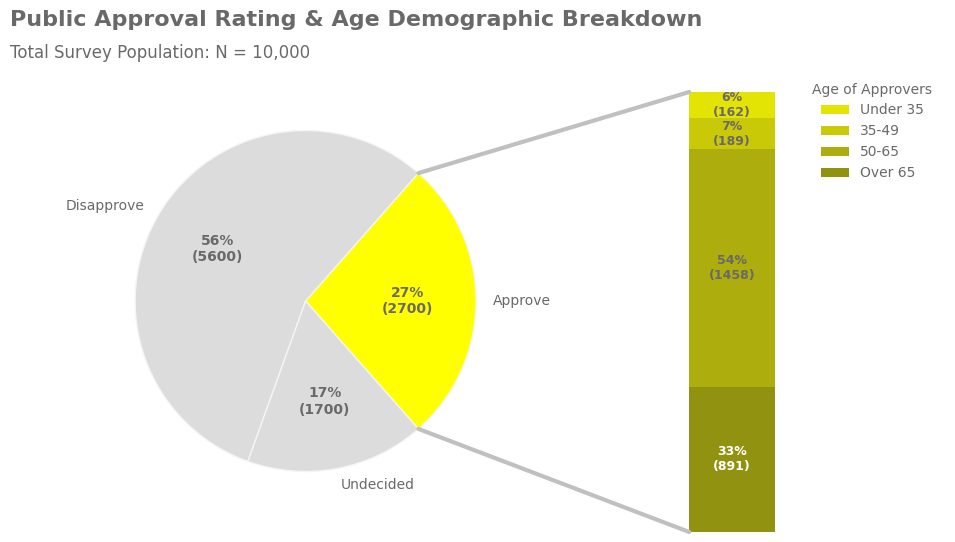

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import ConnectionPatch
from matplotlib.colors import to_rgb
import numpy as np

# --- DATA & SETTINGS ---
overall_counts = [2700, 5600, 1700] # Absolute numbers for pie
labels = ['Approve', 'Disapprove', 'Undecided']
total_n= sum(overall_counts)


age_counts = [162, 189, 1458, 891] # Absolute numbers for bar
age_labels = ['Under 35', '35-49', '50-65', 'Over 65']


age_counts = [162, 189, 1458, 891]
# 1. Calculate the sum of all elements in the list
total_observations = sum(age_counts)
# 2. Use list comprehension to divide each count by the total to get the ratio
age_ratios = [count / total_observations for count in age_counts]

cc = 'yellow'
mc = 'gainsboro'
font_color = 'dimgray'
conector_color = 'silver'

# --- FIGURE CREATION ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 6))
fig.subplots_adjust(wspace=0)

# --- PIE CHART SECTION (AX1) ---
angle = -180 * overall_ratios[0]
colors = [cc, mc, mc]
explode = [0, 0, 0]

# Function to customize text
def func_format(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{pct:.0f}%\n({absolute})"

wedges, _, autotexts = ax1.pie(overall_counts,
                      autopct=lambda pct: func_format(pct, overall_counts),
                      startangle=angle,
                      labels=labels,
                      colors=colors,
                      wedgeprops={'edgecolor': 'whitesmoke', 'linewidth': 1},
                      textprops={'color': font_color, 'fontsize': 10})

# Dynamic text coloring for percentages
for i, color in enumerate(colors):
    rgb = to_rgb(color)
    brightness = (rgb[0] * 299 + rgb[1] * 587 + rgb[2] * 114) / 1000
    text_color = 'white' if brightness < 0.6 else 'dimgray'
    autotexts[i].set_color(text_color)
    autotexts[i].set_weight('bold')

# --- BAR CHART SECTION (AX2) ---
bottom = 1
width = 0.25
paleta = sns.dark_palette(cc,
                          n_colors=len(age_ratios) + 5,
                          reverse=True)

# We iterate through the data to build the stacked bar
for j, (rel, count, label) in enumerate(zip(age_ratios, age_counts, age_labels)):
    bottom -= rel
    current_color = paleta[j+1]
    bc = ax2.bar(0, rel, width, bottom=bottom, color=current_color, label=label)

    # Label formatting: "Percentage% (Count)"
    r, g, b, _ = bc[0].get_facecolor()
    brightness = (r * 299 + g * 587 + b * 114) / 1000
    text_color = 'white' if brightness < 0.6 else 'dimgray'

    ax2.bar_label(bc, labels=[f"{rel:.0%}\n({count})"], label_type='center',
                  color=text_color, fontweight='bold', fontsize=9)

# Legend and Axis adjustment
legend = ax2.legend(frameon=False, title='Age of Approvers',
                    labelcolor=font_color)
legend.get_title().set_color(font_color)
ax2.axis('off')
ax2.set_xlim(-2.5 * width, 2.5 * width)

# --- CONNECTOR LINES SECTION ---
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

x_top = r * np.cos(np.pi / 180 * theta2) + center[0]
y_top = r * np.sin(np.pi / 180 * theta2) + center[1]
con_top = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                          xyB=(x_top, y_top), coordsB=ax1.transData)
con_top.set_color(conector_color)
con_top.set_linewidth(3)
ax2.add_artist(con_top)

x_bot = r * np.cos(np.pi / 180 * theta1) + center[0]
y_bot = r * np.sin(np.pi / 180 * theta1) + center[1]
con_bot = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                          xyB=(x_bot, y_bot), coordsB=ax1.transData)
con_bot.set_color(conector_color)
con_bot.set_linewidth(3)
ax2.add_artist(con_bot)

# --- TITLES ---
plt.suptitle('Public Approval Rating & Age Demographic Breakdown',
             fontsize=16, fontweight='bold', color=font_color, x=0.05, ha='left')
plt.figtext(0.05, 0.9, f'Total Survey Population: N = {total_n:,}',
            fontsize=12, color=font_color, ha='left')

plt.show()
